In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV


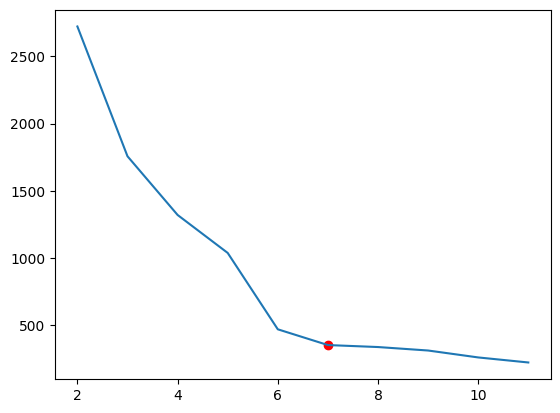

In [4]:
df = pd.read_csv("csv/lit_ref_auth_fund.csv")

X = df[["ReferenceCount","AuthorCount","FundingAgencyCount"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, random_state=100)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,12), wcss)
plt.scatter(7, wcss[5], color="red")
plt.show()

elbow = pd.DataFrame(wcss,index=range(2,12), columns=["WCSS"])
elbow.to_csv("csv/elbow.csv")

In [5]:
kmeans = KMeans(n_clusters=7, random_state=100)
kmeans.fit(X_scaled)
df["Cluster"] = kmeans.labels_
df.to_csv("csv/lit_cluster.csv")



In [6]:
import pickle
with open("kmeans.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [7]:
import plotly.express as px
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"] = X_pca[:,0]
df["PCA2"] = X_pca[:,1]
df.to_csv("csv/lit_cluster.csv")
fig = px.scatter(df, x="PCA1", y="PCA2", color="Cluster")
fig.show()

In [138]:
pca.explained_variance_ # each principal component
loadings = pca.components_ 
loading_df = pd.DataFrame(loadings, columns=X.columns, index=["PC1","PC2"])
loading_df.to_csv("csv/pca.csv")

In [131]:
df = pd.read_csv("csv/lit_cluster.csv")

import plotly.express as px
fig = px.scatter_3d(df, x='AuthorCount', y='ReferenceCount', z='FundingAgencyCount', color='Cluster')
fig.show()